In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.defchararray import add
import seaborn as sns

## Load training dataset

In [2]:
lensed_data = dict(np.load("../data/injection_pars/training/dominik_plaw2_lensed_inj_params_include_pol_phi0.npz"))
unlensed_data = pd.read_csv("../data/injection_pars/training/analytical_psd_Dominik_powerlaw2_inj_samples_withsnr.dat",delimiter='\t')

## Load testing dataset

In [3]:
lensed_data_haris= dict(np.load('../data/injection_pars/haris-et-al/lensed_inj_data.npz'))
unlensed_data_haris= dict(np.load('../data/injection_pars/haris-et-al/unlensed_inj_data.npz'))
unlensed_data_O3a_inj= dict(np.load('../data/injection_pars/O3a/injections_samples_o3a_newrun_Belczynski_image1_LHV_withsnr_filtered.npz'))


In [4]:
lensed_data.keys(),lensed_data_haris.keys()

(dict_keys(['dist', 'm2', 't0', 'pol', 'm1', 'ra', 'phi0', 'dec', 'incl']),
 dict_keys(['data_dir', 'event_tag', 'img_tag', 'img_paths', 'm1', 'm2', 'incl', 'ra', 'dec', 't0', 'pol', 'dist', 'snr', 'phi0']))

In [5]:
lensed_data['m1'].shape,lensed_data_haris['m1'].shape

((2813,), (300,))

In [6]:
unlensed_data.tail()

,z,ldistance,m1z,m2z,ra,dec,iota,pol,tc,s1x,s1y,s1z,s2x,s2y,s2z,snr
999,0.32579,1708.26646,35.13603,12.88358,1.89678,-1.33456,1.02826,3.04611,1.251830e+09,-0.02903,-0.01150,-0.01643,0.20777,0.11328,0.23302,9.18558
1000,0.66684,4014.49661,55.16859,47.99813,1.08925,-0.69958,0.43169,2.02613,1.251764e+09,0.01023,0.00127,-0.03543,-0.01936,0.03284,-0.82841,16.25604
1001,0.47588,2670.08310,59.35198,31.35262,5.79326,0.67739,1.25330,1.60845,1.251783e+09,-0.72468,0.34476,0.04339,-0.70181,-0.08460,-0.35278,10.61765
1002,0.34976,1855.50067,32.18237,28.80638,5.04799,1.13523,0.50599,2.97764,1.251797e+09,-0.54492,-0.19209,-0.31533,0.13251,0.37601,-0.08145,17.56578
1003,0.23213,1158.63293,23.51662,11.44158,5.31470,-1.20754,0.83761,1.69137,1.251759e+09,0.69305,-0.01669,-0.25429,0.06433,0.03478,-0.21013,13.82574


In [7]:
unlensed_data_haris['m1z'].shape

(1000,)

In [8]:
unlensed_data_haris.keys()

dict_keys(['data_dir', 'event_tag', 'm1z', 'm2z', 'iota', 'ra', 'dec', 'tc', 'ldistance', 'snr', 'phi0', 'pol'])

In [9]:
tags_lensed_img1=add(add(lensed_data_haris['event_tag'],'_'),lensed_data_haris['img_tag'][:,0])
tags_lensed_img2=add(add(lensed_data_haris['event_tag'],'_'),lensed_data_haris['img_tag'][:,1])
tags_ul=unlensed_data_haris['event_tag']

In [10]:
t0_from_tags=np.array([[lensed_data_haris['img_tag'][i][0].split('-')[0],lensed_data_haris['img_tag'][i][1].split('-')[0]] for i in range(len(lensed_data_haris['ra']))])

In [11]:
t0_from_tags=t0_from_tags.astype('float64')

# Comparing train and test lensed Datasets

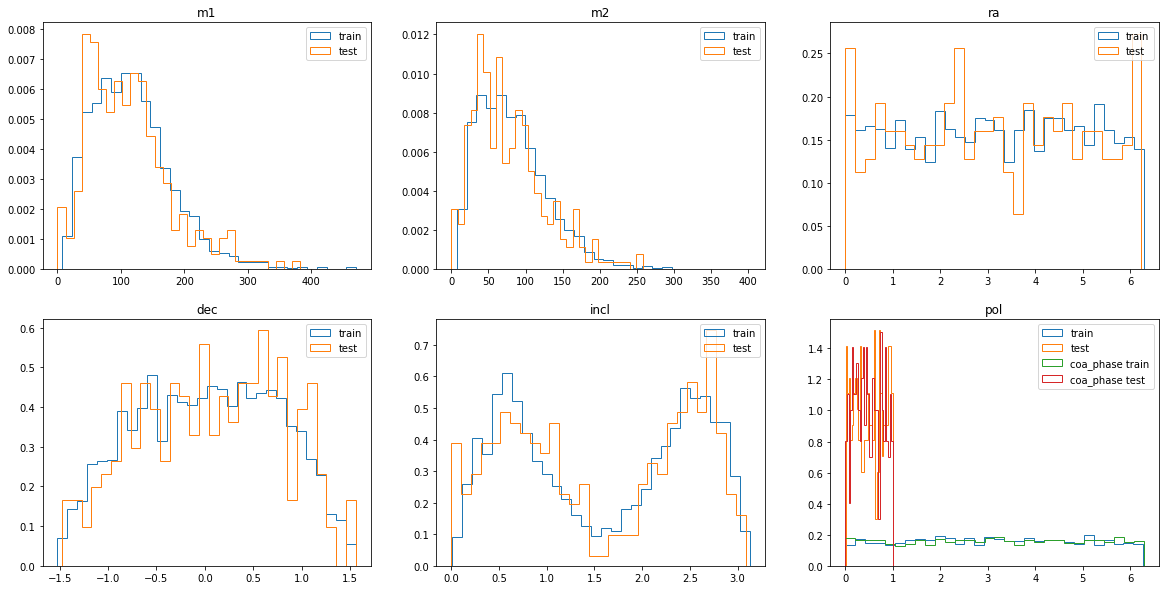

In [12]:
plt.figure(figsize=(20,10))

for i,key in enumerate(['m1', 'm2','ra', 'dec', 'incl','pol']):
    plt.subplot(2,3,i+1)
    b=30
    plt.hist(lensed_data[key],b,histtype='step',label='train',density=True)
    plt.hist(lensed_data_haris[key],b,histtype='step',label='test',density=True)
    plt.title(key)
    plt.legend()
plt.subplot(2,3,6)
plt.hist(lensed_data['phi0'],b,histtype='step',label='coa_phase train',density=True)
plt.hist(lensed_data_haris['phi0'],b,histtype='step',label='coa_phase test',density=True)
plt.legend()
plt.show()

/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


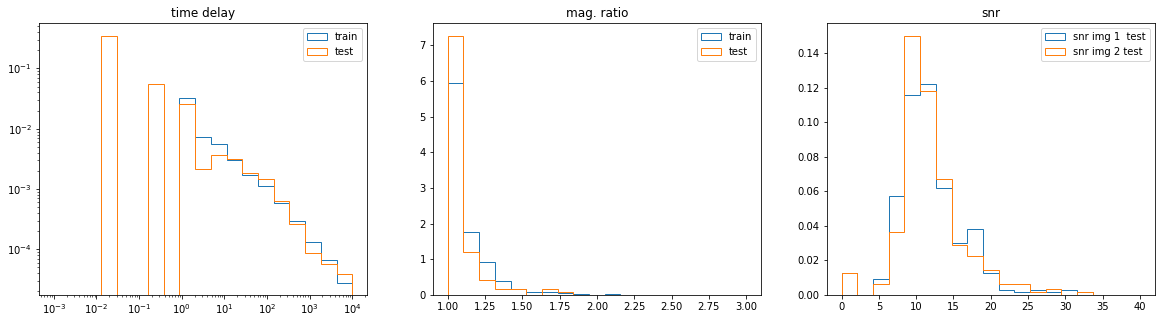

In [13]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
bins= 10**np.linspace(-3,4,20)
plt.hist(np.abs(lensed_data['t0'][:,1]-lensed_data['t0'][:,0]),bins=bins,histtype='step',label='train',density=True)
plt.hist(np.abs(lensed_data_haris['t0'][:,1]-lensed_data_haris['t0'][:,0]),bins=bins,histtype='step',label='test',density=True)
plt.title('time delay')
plt.legend()
plt.xscale('log')
plt.yscale('log')

plt.subplot(1,3,2)
bins=np.linspace(1,3,20)
plt.hist(lensed_data['dist'][:,1]/lensed_data['dist'][:,0],bins=bins,histtype='step',label='train',density=True)
plt.hist(lensed_data_haris['dist'][:,1]/lensed_data_haris['dist'][:,0],bins=bins,histtype='step',label='test',density=True)
plt.title('mag. ratio')
plt.legend()

plt.subplot(1,3,3)
bins=np.linspace(0,40,20)
plt.hist(lensed_data_haris['snr'][:,1],bins=bins,histtype='step',label='snr img 1  test',density=True)
plt.hist(lensed_data_haris['snr'][:,0],bins=bins,histtype='step',label='snr img 2 test',density=True)

plt.legend()
plt.title('snr')
plt.legend()

plt.show()

/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


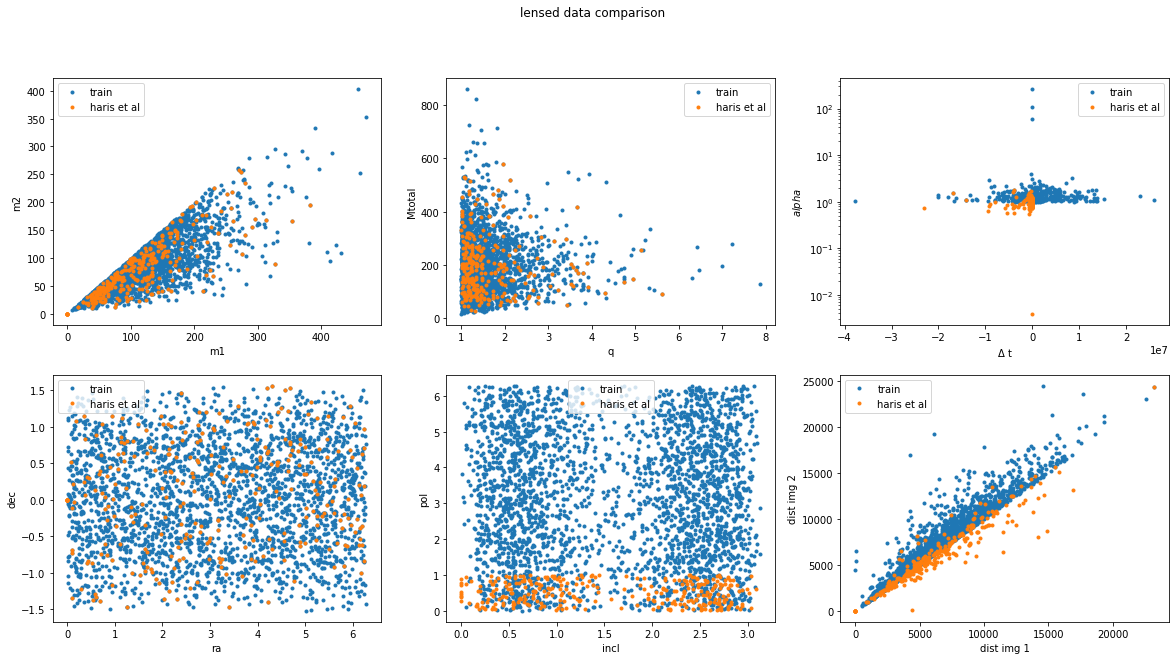

In [14]:
plt.figure(figsize=(20,10))
plt.subplot(231)
plt.plot(lensed_data['m1'],lensed_data['m2'],'.',label='train')
plt.plot(lensed_data_haris['m1'],lensed_data_haris['m2'],'.',label='haris et al')
plt.xlabel('m1')
plt.ylabel('m2')
plt.legend()
plt.subplot(232)
plt.plot(lensed_data['m1']/lensed_data['m2'],lensed_data['m1']+lensed_data['m2'],'.',label='train')
plt.plot(lensed_data_haris['m1']/lensed_data_haris['m2'],lensed_data_haris['m1']+lensed_data_haris['m2'],'.',label='haris et al')
plt.xlabel('q')
plt.ylabel('Mtotal')
plt.legend()
plt.subplot(233)
plt.plot(lensed_data['t0'][:,1]-lensed_data['t0'][:,0],lensed_data['dist'][:,1]/lensed_data['dist'][:,0],'.',label='train')
plt.plot(lensed_data_haris['t0'][:,1]-lensed_data_haris['t0'][:,0],lensed_data_haris['dist'][:,1]/lensed_data_haris['dist'][:,0],'.',label='haris et al')
plt.xlabel(r'$\Delta$ t')
plt.ylabel(r'$alpha$')
#plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.subplot(234)
plt.plot(lensed_data['ra'],lensed_data['dec'],'.',label='train')
plt.plot(lensed_data_haris['ra'],lensed_data_haris['dec'],'.',label='haris et al')
plt.xlabel('ra')
plt.ylabel('dec')
plt.legend()
plt.subplot(235)
plt.plot(lensed_data['incl'],lensed_data['pol'],'.',label='train')
plt.plot(lensed_data_haris['incl'],lensed_data_haris['pol'],'.',label='haris et al')
plt.xlabel('incl')
plt.ylabel('pol')
plt.legend()
plt.subplot(236)
plt.plot(lensed_data['dist'][:,0],lensed_data['dist'][:,1],'.',label='train')
plt.plot(lensed_data_haris['dist'][:,0],lensed_data_haris['dist'][:,1],'.',label='haris et al')
plt.xlabel('dist img 1')
plt.ylabel('dist img 2')
plt.legend()
plt.suptitle('lensed data comparison')
plt.show()


__Conclusions__: 
- Polarisation and inclination angle in test set is only upto pi/2.
- $\Delta t$ distribution has slight  differences b/w the two lensed events datasets for low timedelays.
- Test set contains events of SNR<8 also.
- Rest all the parameters distributions match b/w the train and test set.


In [15]:
ids=unlensed_data_haris['snr']>8

# Comparing train and test unlensed Datasets

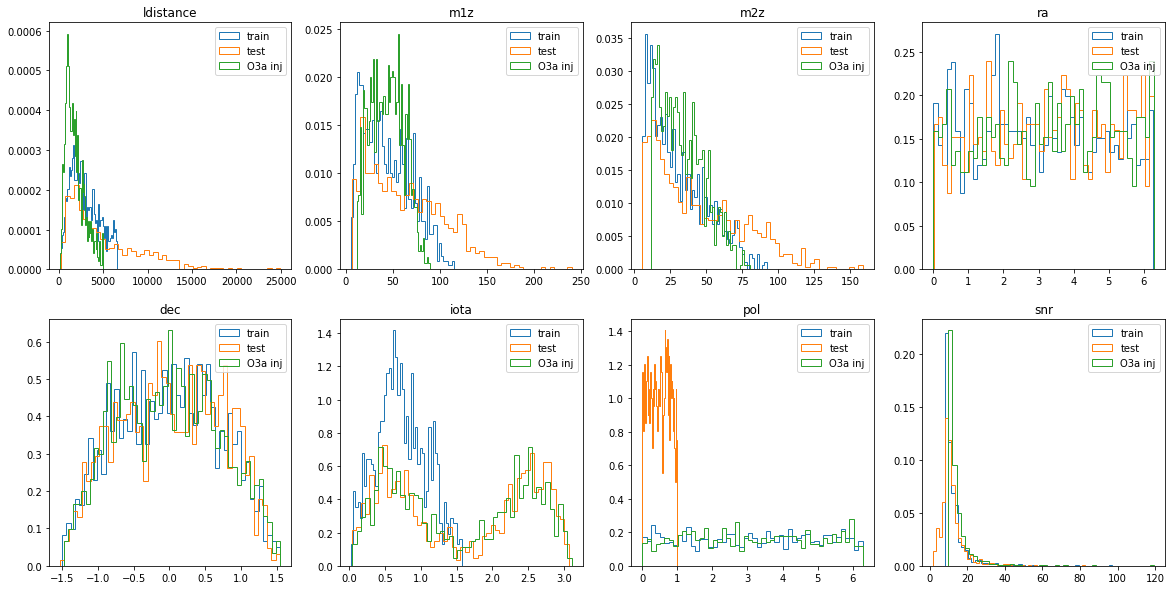

In [16]:
plt.figure(figsize=(20,10))

for i,key in enumerate(['ldistance', 'm1z', 'm2z', 'ra', 'dec', 'iota','pol','snr']):
    plt.subplot(2,4,i+1)
    b=50
    plt.hist(unlensed_data[key],b,histtype='step',label='train',density=True)
    plt.hist(unlensed_data_haris[key],b,histtype='step',label='test',density=True)
    plt.hist(unlensed_data_O3a_inj[key],b,histtype='step',label='O3a inj',density=True)

    plt.title(key)
    plt.legend()
plt.show()

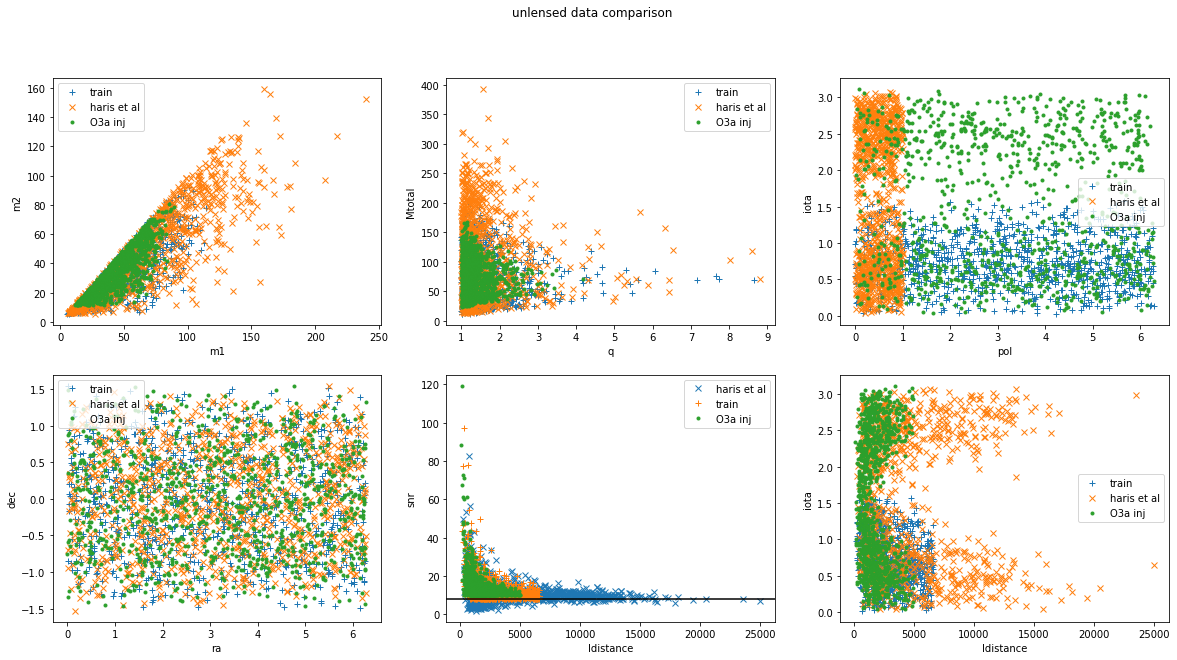

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(231)
plt.plot(unlensed_data['m1z'],unlensed_data['m2z'],'+',label='train')
plt.plot(unlensed_data_haris['m1z'],unlensed_data_haris['m2z'],'x',label='haris et al')
plt.plot(unlensed_data_O3a_inj['m1z'],unlensed_data_O3a_inj['m2z'],'.',label='O3a inj')

plt.xlabel('m1')
plt.ylabel('m2')
plt.legend()
plt.subplot(232)
plt.plot(unlensed_data['m1z']/unlensed_data['m2z'],unlensed_data['m1z']+unlensed_data['m2z'],'+',label='train')
plt.plot(unlensed_data_haris['m1z']/unlensed_data_haris['m2z'],unlensed_data_haris['m1z']+unlensed_data_haris['m2z'],'x',label='haris et al')
plt.plot(unlensed_data_O3a_inj['m1z']/unlensed_data_O3a_inj['m2z'],unlensed_data_O3a_inj['m1z']+unlensed_data_O3a_inj['m2z'],'.',label='O3a inj')

plt.xlabel('q')
plt.ylabel('Mtotal')
plt.legend()
plt.subplot(233)
plt.plot(unlensed_data['pol'],unlensed_data['iota'],'+',label='train')
plt.plot(unlensed_data_haris['pol'],unlensed_data_haris['iota'],'x',label='haris et al')
plt.plot(unlensed_data_O3a_inj['pol'],unlensed_data_O3a_inj['iota'],'.',label='O3a inj')

plt.xlabel('pol')
plt.ylabel('iota')
plt.legend()
plt.subplot(234)
plt.plot(unlensed_data['ra'],unlensed_data['dec'],'+',label='train')
plt.plot(unlensed_data_haris['ra'],unlensed_data_haris['dec'],'x',label='haris et al')
plt.plot(unlensed_data_O3a_inj['ra'],unlensed_data_O3a_inj['dec'],'.',label='O3a inj')

plt.xlabel('ra')
plt.ylabel('dec')
plt.legend()
plt.subplot(235)
plt.plot(unlensed_data_haris['ldistance'],unlensed_data_haris['snr'],'x',label='haris et al')
plt.plot(unlensed_data['ldistance'],unlensed_data['snr'],'+',label='train')
plt.plot(unlensed_data_O3a_inj['ldistance'],unlensed_data_O3a_inj['snr'],'.',label='O3a inj')

plt.axhline(8,color='k')
plt.xlabel('ldistance')
plt.ylabel('snr')
plt.legend()
plt.subplot(236)
plt.plot(unlensed_data['ldistance'],unlensed_data['iota'],'+',label='train')
plt.plot(unlensed_data_haris['ldistance'],unlensed_data_haris['iota'],'x',label='haris et al')
plt.plot(unlensed_data_O3a_inj['ldistance'],unlensed_data_O3a_inj['iota'],'.',label='O3a inj')

plt.xlabel('ldistance')
plt.ylabel('iota')
plt.legend()
plt.suptitle('unlensed data comparison')
plt.show()

__Conclusions__: 
- Polarisation and inclination angle in test set is only upto pi/2.
- Test set contains events of SNR<8 also.
- The luminosity distance in train set is cut at z=1 (~5500 Mpc)
- Rest all the parameters distributions match b/w the train and test set.


# min masses in the injection set

In [34]:
np.min(unlensed_data_O3a_inj['m2z']),np.min(unlensed_data['m2z']),np.min(unlensed_data_haris['m2z'])

(11.40651, 5.3959, 5.53950867097)

In [32]:
np.min(lensed_data['m2'])

7.490694999694824

In [30]:
np.min(lensed_data_haris['m2'][lensed_data_haris['m2']>0])

11.0845751777

# chirp masses

In [4]:
unlensed_data_haris= dict(np.load('../data/injection_pars/haris-et-al/unlensed_inj_data.npz'))

m1,m2 = unlensed_data_haris['m1z'],unlensed_data_haris['m2z']

In [5]:
import pycbc.conversions as convert
mchirp = convert.mchirp_from_mass1_mass2(m1,m2)

In [6]:
from itertools import combinations

In [11]:
mchirp_pairs = np.array(list(combinations(mchirp, 2)))


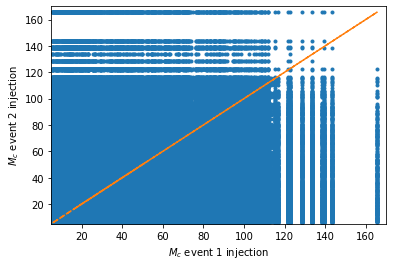

In [16]:
plt.plot(mchirp_pairs[:,0],mchirp_pairs[:,1],'.')
plt.plot(mchirp_pairs[:,0],mchirp_pairs[:,0],'--')
plt.xlabel('$M_c$ event 1 injection')
plt.ylabel('$M_c$ event 2 injection')
plt.xlim(5,170)
plt.ylim(5,170)
plt.show()